### PAIR 2. TEST ESTADÍSTICOS.


----------------

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('data/supermarket_1.csv', index_col= 0)
df.sample(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
410,244-08-0162,B,Mandalay,Normal,Female,Health and beauty,34.21,10,17.1050,359.2050,1/2/2019,13:00,Cash,342.10,17.1050,5.1
757,406-46-7107,A,Yangon,Normal,Female,Home and lifestyle,96.52,6,28.9560,608.0760,1/11/2019,11:52,Cash,579.12,28.9560,4.5
872,544-55-9589,B,Mandalay,Member,Female,Electronic accessories,21.43,10,10.7150,225.0150,1/28/2019,11:51,Cash,214.30,10.7150,6.2
703,729-06-2010,B,Mandalay,Member,Male,Health and beauty,80.47,9,36.2115,760.4415,1/6/2019,11:18,Cash,724.23,36.2115,9.2
449,449-27-2918,B,Mandalay,Member,Female,Sports and travel,39.12,1,1.9560,41.0760,3/26/2019,11:02,Credit card,39.12,1.9560,9.6


1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

H0: La variable A NO afecta a la variable B.

H1: La variable A afecta a la variable B.

- Error tipo 1: Falso positivo.
- Error tipo 2: Falso negativo.

En nuestro caso: 

- Predicción general: ¿Cuánto dinero se gastará un nuevo cliente en una compra?

H0: Que la línea de producto NO afecta a la cantidad de productos que compran

H1: Que la línea de producto SÍ afecta a la cantidad de productos que compran

- Error tipo 1: Falso positivo. Si la empresa tiene venta más agresiva, preferiríamos este
- Error tipo 2: Falso negativo. Preferimos este error en este caso que la empresa sea cauta (que salga que NO influye aunque SÍ influya), porque si fuera al contrario invertiríamos dinero en una campaña que no es cierta.

2. ¿Qué es la asimetría?

Quiere decir que la media es mayor o menor a la mediana y a la moda.

3. ¿Es vuestra variable respuesta asimétrica?

In [12]:
df["quantity"]. unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9])

In [13]:
df["quantity"].value_counts()

quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

In [15]:
df["quantity"].skew()

0.012941048017172435

Los datos tienen una asimetría positiva, la media es mayor a la mediana y a la moda por lo que no son simétricos

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [17]:
kurtosistest(df["quantity"])

KurtosistestResult(statistic=-28.897670963199943, pvalue=1.2771514669146152e-183)

Mesocurtosis porque es casi igual a 0

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

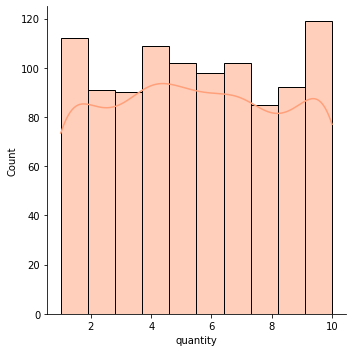

In [27]:
sns.displot(df["quantity"], kde = True, color = "lightsalmon", bins= 10);

In [20]:
stats.shapiro(df["quantity"])

ShapiroResult(statistic=0.9325848817825317, pvalue=7.980551308206381e-21)

Según el test shapiro (porque tenemos menos de 5000 registros) podemos descartar la hipotesis 0 por lo que los datos no son normales. Además, no se observa la campana de Gauss en la gráfica.